In [1]:
import numpy as np
import xarray as xr
from dask.diagnostics import ProgressBar
from xgcm import Grid
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

%matplotlib inline

In [2]:
datapath = '/srv/scratch/z3097808/20year_run/20year_freerun_output_NEWnci/'
ds = xr.open_mfdataset(datapath + 'outer_avg_01*.nc', chunks={'ocean_time': 100}, combine='by_coords', decode_coords=True)
ds

<xarray.Dataset>
Dimensions:      (Nuser: 25, boundary: 4, eta_psi: 316, eta_rho: 317, eta_u: 317, eta_v: 316, ocean_time: 540, s_rho: 30, s_w: 31, tracer: 2, xi_psi: 271, xi_rho: 272, xi_u: 271, xi_v: 272)
Coordinates:
    lat_u        (eta_u, xi_u) float64 dask.array<chunksize=(317, 271), meta=np.ndarray>
    lon_u        (eta_u, xi_u) float64 dask.array<chunksize=(317, 271), meta=np.ndarray>
    lat_rho      (eta_rho, xi_rho) float64 dask.array<chunksize=(317, 272), meta=np.ndarray>
    lon_v        (eta_v, xi_v) float64 dask.array<chunksize=(316, 272), meta=np.ndarray>
    lon_psi      (eta_psi, xi_psi) float64 dask.array<chunksize=(316, 271), meta=np.ndarray>
    lat_psi      (eta_psi, xi_psi) float64 dask.array<chunksize=(316, 271), meta=np.ndarray>
    lat_v        (eta_v, xi_v) float64 dask.array<chunksize=(316, 272), meta=np.ndarray>
    lon_rho      (eta_rho, xi_rho) float64 dask.array<chunksize=(317, 272), meta=np.ndarray>
  * s_rho        (s_rho) float64 -0.9715 -0.9156 -0.8614 ... -0.0156 -0.004799
  * s_w          (s_w) float64 -1.0 -0.9433 -0.8883 ... -0.02161 -0.01 0.0
  * ocean_time   (ocean_time) datetime64[ns] 1994-01-01T12:00:00 ... 1995-06-24T12:00:00
Dimensions without coordinates: Nuser, boundary, eta_psi, eta_rho, eta_u, eta_v, tracer, xi_psi, xi_rho, xi_u, xi_v
Data variables:
    ntimes       (ocean_time) int32 8640 8640 8640 8640 ... 8640 8640 8640 8640
    ndtfast      (ocean_time) int32 35 35 35 35 35 35 35 ... 35 35 35 35 35 35
    dt           (ocean_time) float64 300.0 300.0 300.0 ... 300.0 300.0 300.0
    dtfast       (ocean_time) float64 8.571 8.571 8.571 ... 8.571 8.571 8.571
    dstart       (ocean_time) datetime64[ns] 1994-01-01 ... 1995-05-26
    nHIS         (ocean_time) int32 8640 8640 8640 8640 ... 8640 8640 8640 8640
    ndefHIS      (ocean_time) int32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    nRST         (ocean_time) int32 8640 8640 8640 8640 ... 8640 8640 8640 8640
    ntsAVG       (ocean_time) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    nAVG         (ocean_time) int32 288 288 288 288 288 ... 288 288 288 288 288
    ndefAVG      (ocean_time) int32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    Falpha       (ocean_time) float64 2.0 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0
    Fbeta        (ocean_time) float64 4.0 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    Fgamma       (ocean_time) float64 0.284 0.284 0.284 ... 0.284 0.284 0.284
    nl_tnu2      (ocean_time, tracer) float64 dask.array<chunksize=(30, 2), meta=np.ndarray>
    nl_visc2     (ocean_time) float64 55.0 55.0 55.0 55.0 ... 55.0 55.0 55.0
    Akt_bak      (ocean_time, tracer) float64 dask.array<chunksize=(30, 2), meta=np.ndarray>
    Akv_bak      (ocean_time) float64 2e-05 2e-05 2e-05 ... 2e-05 2e-05 2e-05
    Akk_bak      (ocean_time) float64 5e-06 5e-06 5e-06 ... 5e-06 5e-06 5e-06
    Akp_bak      (ocean_time) float64 5e-06 5e-06 5e-06 ... 5e-06 5e-06 5e-06
    rdrg         (ocean_time) float64 0.0003 0.0003 0.0003 ... 0.0003 0.0003
    rdrg2        (ocean_time) float64 0.003 0.003 0.003 ... 0.003 0.003 0.003
    Zob          (ocean_time) float64 0.02 0.02 0.02 0.02 ... 0.02 0.02 0.02
    Zos          (ocean_time) float64 0.02 0.02 0.02 0.02 ... 0.02 0.02 0.02
    Znudg        (ocean_time) float64 0.1429 0.1429 0.1429 ... 0.1429 0.1429
    M2nudg       (ocean_time) float64 0.1429 0.1429 0.1429 ... 0.1429 0.1429
    M3nudg       (ocean_time) float64 0.1429 0.1429 0.1429 ... 0.1429 0.1429
    Tnudg        (ocean_time, tracer) float64 dask.array<chunksize=(30, 2), meta=np.ndarray>
    FSobc_in     (ocean_time, boundary) float64 dask.array<chunksize=(30, 4), meta=np.ndarray>
    FSobc_out    (ocean_time, boundary) float64 dask.array<chunksize=(30, 4), meta=np.ndarray>
    M2obc_in     (ocean_time, boundary) float64 dask.array<chunksize=(30, 4), meta=np.ndarray>
    M2obc_out    (ocean_time, boundary) float64 dask.array<chunksize=(30, 4), meta=np.ndarray>
    Tobc_in      (ocean_time, boundary, tracer) float64 dask.array<

In [3]:
print('Total Size: %6.2F GB' % (ds.nbytes / 1e9))

Total Size:  33.11 GB


In [4]:
test=ds.isel(xi_rho=slice(75,95), eta_v=slice(75,95), eta_rho=slice(75,95),xi_u=slice(75,95))
test

<xarray.Dataset>
Dimensions:      (Nuser: 25, boundary: 4, eta_psi: 316, eta_rho: 20, eta_u: 317, eta_v: 20, ocean_time: 540, s_rho: 30, s_w: 31, tracer: 2, xi_psi: 271, xi_rho: 20, xi_u: 20, xi_v: 272)
Coordinates:
    lat_u        (eta_u, xi_u) float64 dask.array<chunksize=(317, 20), meta=np.ndarray>
    lon_u        (eta_u, xi_u) float64 dask.array<chunksize=(317, 20), meta=np.ndarray>
    lat_rho      (eta_rho, xi_rho) float64 dask.array<chunksize=(20, 20), meta=np.ndarray>
    lon_v        (eta_v, xi_v) float64 dask.array<chunksize=(20, 272), meta=np.ndarray>
    lon_psi      (eta_psi, xi_psi) float64 dask.array<chunksize=(316, 271), meta=np.ndarray>
    lat_psi      (eta_psi, xi_psi) float64 dask.array<chunksize=(316, 271), meta=np.ndarray>
    lat_v        (eta_v, xi_v) float64 dask.array<chunksize=(20, 272), meta=np.ndarray>
    lon_rho      (eta_rho, xi_rho) float64 dask.array<chunksize=(20, 20), meta=np.ndarray>
  * s_rho        (s_rho) float64 -0.9715 -0.9156 -0.8614 ... -0.0156 -0.004799
  * s_w          (s_w) float64 -1.0 -0.9433 -0.8883 ... -0.02161 -0.01 0.0
  * ocean_time   (ocean_time) datetime64[ns] 1994-01-01T12:00:00 ... 1995-06-24T12:00:00
Dimensions without coordinates: Nuser, boundary, eta_psi, eta_rho, eta_u, eta_v, tracer, xi_psi, xi_rho, xi_u, xi_v
Data variables:
    ntimes       (ocean_time) int32 8640 8640 8640 8640 ... 8640 8640 8640 8640
    ndtfast      (ocean_time) int32 35 35 35 35 35 35 35 ... 35 35 35 35 35 35
    dt           (ocean_time) float64 300.0 300.0 300.0 ... 300.0 300.0 300.0
    dtfast       (ocean_time) float64 8.571 8.571 8.571 ... 8.571 8.571 8.571
    dstart       (ocean_time) datetime64[ns] 1994-01-01 ... 1995-05-26
    nHIS         (ocean_time) int32 8640 8640 8640 8640 ... 8640 8640 8640 8640
    ndefHIS      (ocean_time) int32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    nRST         (ocean_time) int32 8640 8640 8640 8640 ... 8640 8640 8640 8640
    ntsAVG       (ocean_time) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    nAVG         (ocean_time) int32 288 288 288 288 288 ... 288 288 288 288 288
    ndefAVG      (ocean_time) int32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    Falpha       (ocean_time) float64 2.0 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0
    Fbeta        (ocean_time) float64 4.0 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    Fgamma       (ocean_time) float64 0.284 0.284 0.284 ... 0.284 0.284 0.284
    nl_tnu2      (ocean_time, tracer) float64 dask.array<chunksize=(30, 2), meta=np.ndarray>
    nl_visc2     (ocean_time) float64 55.0 55.0 55.0 55.0 ... 55.0 55.0 55.0
    Akt_bak      (ocean_time, tracer) float64 dask.array<chunksize=(30, 2), meta=np.ndarray>
    Akv_bak      (ocean_time) float64 2e-05 2e-05 2e-05 ... 2e-05 2e-05 2e-05
    Akk_bak      (ocean_time) float64 5e-06 5e-06 5e-06 ... 5e-06 5e-06 5e-06
    Akp_bak      (ocean_time) float64 5e-06 5e-06 5e-06 ... 5e-06 5e-06 5e-06
    rdrg         (ocean_time) float64 0.0003 0.0003 0.0003 ... 0.0003 0.0003
    rdrg2        (ocean_time) float64 0.003 0.003 0.003 ... 0.003 0.003 0.003
    Zob          (ocean_time) float64 0.02 0.02 0.02 0.02 ... 0.02 0.02 0.02
    Zos          (ocean_time) float64 0.02 0.02 0.02 0.02 ... 0.02 0.02 0.02
    Znudg        (ocean_time) float64 0.1429 0.1429 0.1429 ... 0.1429 0.1429
    M2nudg       (ocean_time) float64 0.1429 0.1429 0.1429 ... 0.1429 0.1429
    M3nudg       (ocean_time) float64 0.1429 0.1429 0.1429 ... 0.1429 0.1429
    Tnudg        (ocean_time, tracer) float64 dask.array<chunksize=(30, 2), meta=np.ndarray>
    FSobc_in     (ocean_time, boundary) float64 dask.array<chunksize=(30, 4), meta=np.ndarray>
    FSobc_out    (ocean_time, boundary) float64 dask.array<chunksize=(30, 4), meta=np.ndarray>
    M2obc_in     (ocean_time, boundary) float64 dask.array<chunksize=(30, 4), meta=np.ndarray>
    M2obc_out    (ocean_time, boundary) float64 dask.array<chunksize=(30, 4), meta=np.ndarray>
    Tobc_in      (ocean_time, boundary, tracer) float64 dask.array<chunksize=(3

(array([11880., 22680., 24300., 24300., 23760., 24840., 24300., 24300.,
        23760., 11880.]),
 array([0.00039998, 0.00039998, 0.00039998, 0.00039998, 0.00039998,
        0.00039998, 0.00039998, 0.00039998, 0.00039998, 0.00039998,
        0.00039998]),
 <a list of 10 Patch objects>)

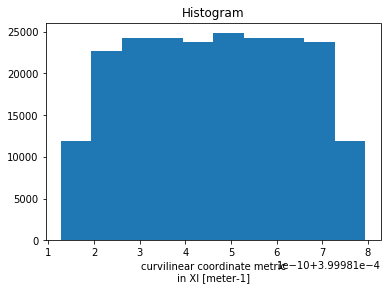

In [5]:
test.pm.plot()

# Creating a grid object
While xgcm doesn't currently have an implementation for the SGRID convention for ROMS, a workaround consist on renaming eta_u and xi_v dimensions to rho. With this replacement 'psi' points have now a position (eta_v, xi_u). See issue here https://github.com/xgcm/xgcm/issues/108

Here I also test to see if the new XGCM 'metrics' functionality works.

In [6]:
# Including metrics
ds = ds.rename({'eta_u': 'eta_rho', 'xi_v': 'xi_rho', 'xi_psi': 'xi_u', 'eta_psi': 'eta_v'})

coords={'X':{'center':'xi_rho', 'inner':'xi_u'}, 
    'Y':{'center':'eta_rho', 'inner':'eta_v'}, 
    'Z':{'center':'s_rho', 'outer':'s_w'}}

grid = Grid(ds, coords=coords, periodic=[])

Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
z_rho = Zo_rho * (ds.zeta + ds.h) + ds.zeta
Zo_w = (ds.hc * ds.s_w + ds.Cs_w * ds.h) / (ds.hc + ds.h)
z_w = Zo_w * (ds.zeta + ds.h) + ds.zeta

ds.coords['z_w'] = z_w.where(ds.mask_rho, 0).transpose('ocean_time', 's_w', 'eta_rho', 'xi_rho')
ds.coords['z_rho'] = z_rho.where(ds.mask_rho, 0).transpose('ocean_time', 's_rho', 'eta_rho', 'xi_rho')


ds['pm_v'] = grid.interp(ds.pm, 'Y')
ds['pn_u'] = grid.interp(ds.pn, 'X')
ds['pm_u'] = grid.interp(ds.pm, 'X')
ds['pn_v'] = grid.interp(ds.pn, 'Y')
ds['pm_psi'] = grid.interp(grid.interp(ds.pm, 'Y'),  'X') # at psi points (eta_v, xi_u) 
ds['pn_psi'] = grid.interp(grid.interp(ds.pn, 'X'),  'Y') # at psi points (eta_v, xi_u)

ds['dx'] = 1/ds.pm
ds['dx_u'] = 1/ds.pm_u
ds['dx_v'] = 1/ds.pm_v
ds['dx_psi'] = 1/ds.pm_psi

ds['dy'] = 1/ds.pn
ds['dy_u'] = 1/ds.pn_u
ds['dy_v'] = 1/ds.pn_v
ds['dy_psi'] = 1/ds.pn_psi

ds['dz'] = grid.diff(ds.z_w, 'Z', boundary='fill')
ds['dz_w'] = grid.diff(ds.z_rho, 'Z', boundary='fill')
ds['dz_u'] = grid.interp(ds.dz, 'X')
ds['dz_w_u'] = grid.interp(ds.dz_w, 'X')
ds['dz_v'] = grid.interp(ds.dz, 'Y')
ds['dz_w_v'] = grid.interp(ds.dz_w, 'Y')

ds['dA'] = ds.dx * ds.dy

metrics = {
    ('X',): ['dx', 'dx_u', 'dx_v', 'dx_psi'], # X distances
    ('Y',): ['dy', 'dy_u', 'dy_v', 'dy_psi'], # Y distances
    ('Z',): ['dz', 'dz_u', 'dz_v', 'dz_w', 'dz_w_u', 'dz_w_v'], # Z distances
    ('X', 'Y'): ['dA'] # Areas
}
grid = Grid(ds, coords=coords, metrics=metrics, periodic=[])

/home/z3526974/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.
  from ipykernel import kernelapp as app
/home/z3526974/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.
  app.launch_new_instance()


In [7]:
V_z = grid.integrate(ds.v, 'Z')
U_z = grid.integrate(ds.u, 'Z')


a = grid.integrate(V_z, ['X', 'Y'])
b = grid.integrate(U_z, ['X', 'Y'])
a.mean().values

array(-1.34843574e+13)

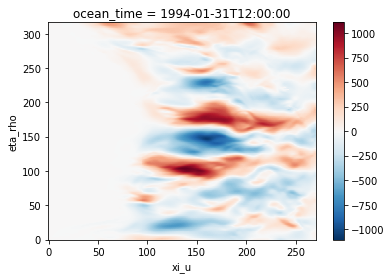

In [8]:
# fig = plt.figure(figsize=(8,8))
# coast = cfeature.NaturalEarthFeature(category='physical', scale='10m',
#                             facecolor='none', name='coastline')
# ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([149, 165, -38, -26])
U_z.sel(ocean_time = '1994-01-31').plot()#transform=ccrs.PlateCarree())
# gl = ax.gridlines(draw_labels=True,
#              color='black', alpha=0.2, linestyle='--')
# feature = ax.add_feature(coast, edgecolor='black',facecolor='gray')

# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
# gl.ylabels_right = False
# gl.xlabels_top = False

## Great, so grid-aware integration works. Now we need to set up a box that we can do our budget in

First, let's have a look at a map of the model grid.

In [9]:
ii = 75
jj = 80
box = np.arange(ii,jj+1)

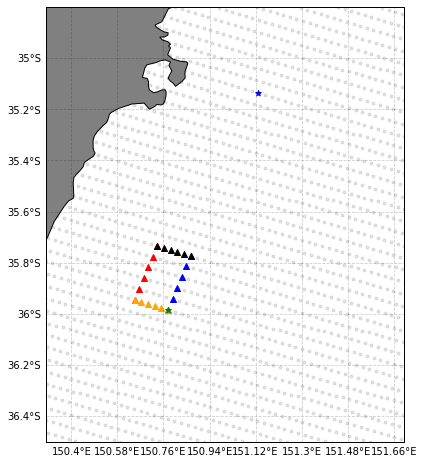

In [10]:
#Plot the grid
fig = plt.figure(figsize=(8,8))
coast = cfeature.NaturalEarthFeature(category='physical', scale='10m',
                            facecolor='none', name='coastline')
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([150.3, 151.7, -36.5, -34.8])
plt.scatter(ds.lon_rho, ds.lat_rho, c="black", alpha=0.1, marker='.',transform=ccrs.PlateCarree())
plt.scatter(ds.lon_rho[box,ii], ds.lat_rho[box,ii], color='red', marker='^',transform=ccrs.PlateCarree())
plt.scatter(ds.lon_rho[box,jj], ds.lat_rho[box,jj], color='blue', marker='^',transform=ccrs.PlateCarree())
plt.scatter(ds.lon_rho[jj,box], ds.lat_rho[jj,box], color='black', marker='^',transform=ccrs.PlateCarree())
plt.scatter(ds.lon_rho[ii,box], ds.lat_rho[ii,box], color='orange', marker='^',transform=ccrs.PlateCarree())
plt.scatter(ds.lon_rho[ii,jj], ds.lat_rho[ii,jj], color='green', marker='*',transform=ccrs.PlateCarree())
plt.scatter(ds.lon_rho[ii,jj-20], ds.lat_rho[ii,jj-20], color='red', marker='*',transform=ccrs.PlateCarree())
plt.scatter(ds.lon_rho[ii+20,jj-20], ds.lat_rho[ii+20,jj-20], color='black', marker='*',transform=ccrs.PlateCarree())
plt.scatter(ds.lon_rho[ii+20,jj], ds.lat_rho[ii+20,jj], color='blue', marker='*',transform=ccrs.PlateCarree())

gl = ax.gridlines(draw_labels=True,
             color='black', alpha=0.2, linestyle='--')
feature = ax.add_feature(coast, edgecolor='black',facecolor='gray')

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylabels_right = False
gl.xlabels_top = False

In [11]:
#Get V_z and U_z for each face of the box
V_z_north = V_z[:,jj,box] 
U_z_north = U_z[:,jj,box] 

V_z_south = V_z[:,ii,box] 
U_z_south = U_z[:,ii,box]

V_z_east = V_z[:,box,jj] 
U_z_east = V_z[:,box,jj]

V_z_west = V_z[:,box,ii] 
U_z_west = V_z[:,box,ii]


# Now we need to rotate the depth int velocities to be normal to the box

In [12]:
import math

def rotate(x,y,xo,yo,theta): #rotate x,y around xo,yo by theta (rad)
    xr=math.cos(theta)*(x-xo)-math.sin(theta)*(y-yo)   + xo
    yr=math.sin(theta)*(x-xo)+math.cos(theta)*(y-yo)  + yo
    return xr,yr

In [13]:
# get angle of the box (i.e. angle that we need to rotate)
def get_angle(lat1, long1, lat2, long2):
    dLon = (long2 - long1)

    y = math.sin(dLon) * math.cos(lat2)
    x = math.cos(lat1) * math.sin(lat2) - math.sin(lat1) * math.cos(lat2) * math.cos(dLon)

    angle = math.atan2(y, x)
    
    return angle

In [14]:
box_angle_top = get_angle( ds.lat_rho[ii,jj], ds.lon_rho[ii,jj], ds.lat_rho[ii,jj-20], ds.lon_rho[ii,jj-20])
box_angle_side = box_angle_top+90*(np.pi/180)
box_angle_side

2.47877793821483

In [15]:
north_vel_rot = (rotate(U_z_north,V_z_north,0,0,box_angle_top)[1])
south_vel_rot = (rotate(U_z_south,V_z_south,0,0,box_angle_top)[1])
east_vel_rot = (rotate(U_z_east,V_z_east,0,0,box_angle_side)[1])
west_vel_rot = (rotate(U_z_west,V_z_west,0,0,box_angle_side)[1])

#change signs so that positive is into the box for all sides
north_vel_rot = north_vel_rot*-1
east_vel_rot = east_vel_rot*-1

In [24]:
n = north_vel_rot.sel(xi_u = 0).sum(axis=1)*.5
s = south_vel_rot.sel(xi_u = 0).sum(axis=1)*.5
e = east_vel_rot.sum(axis=1)
w = west_vel_rot.sum(axis=1)


<xarray.DataArray (ocean_time: 540)>
dask.array<mul, shape=(540,), dtype=float64, chunksize=(30,), chunktype=numpy.ndarray>
Coordinates:
    lat_u       float64 dask.array<chunksize=(), meta=np.ndarray>
    lon_u       float64 dask.array<chunksize=(), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 1994-01-01T12:00:00 ... 1995-06-24T12:00:00

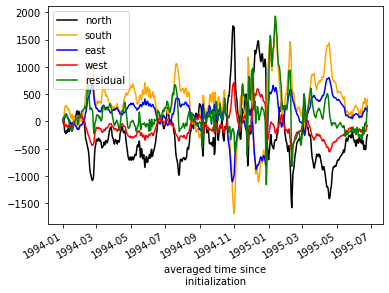

In [17]:
residual = n+s+e+w
n.plot(c='black',label='north')
s.plot(c='orange',label='south')
e.plot(c='blue',label='east')
w.plot(c='red',label='west')
residual.plot(c='green',label='residual')
plt.legend()
plt.savefig('vol_budget_V1', dpi=300,bbox_inches='tight')

In [28]:
n.resample(ocean_time='1M')

DataArrayResample, grouped over '__resample_dim__' 
18 groups with labels 1994-01-31, ..., 1995-06-30.

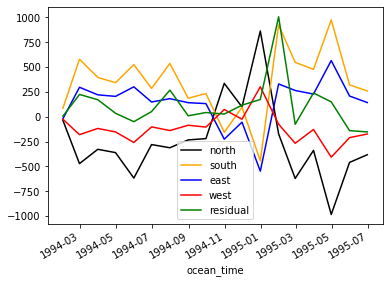

In [29]:
n.resample(ocean_time='1M').mean().plot(c='black',label='north')
s.resample(ocean_time='1M').mean().plot(c='orange',label='south')
e.resample(ocean_time='1M').mean().plot(c='blue',label='east')
w.resample(ocean_time='1M').mean().plot(c='red',label='west')
residual.resample(ocean_time='1M').mean().plot(c='green',label='residual')
plt.legend()
plt.savefig('monthly_vol_budget_V1', dpi=300,bbox_inches='tight')

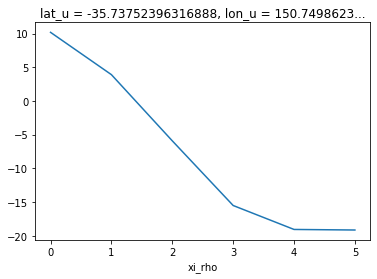

In [18]:
north_vel_rot.sel(ocean_time='1994-01-01',xi_u = 0).plot()

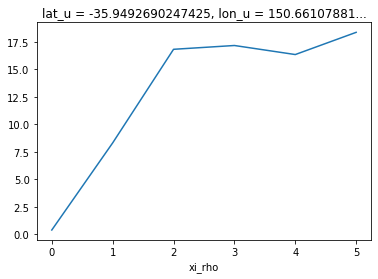

In [19]:
south_vel_rot.sel(ocean_time='1994-01-01',xi_u = 0).plot()

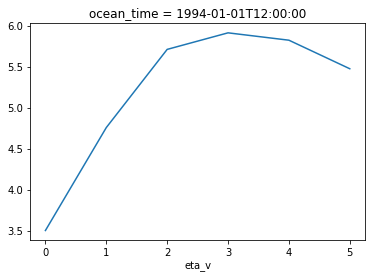

In [20]:
east_vel_rot.sel(ocean_time='1994-01-01').plot()

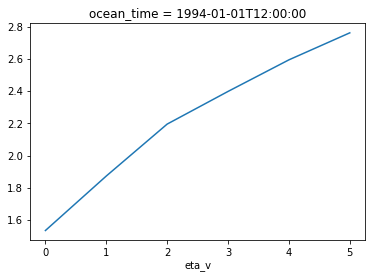

In [21]:
west_vel_rot.sel(ocean_time='1994-01-01').plot()

## Check rotations are accurate

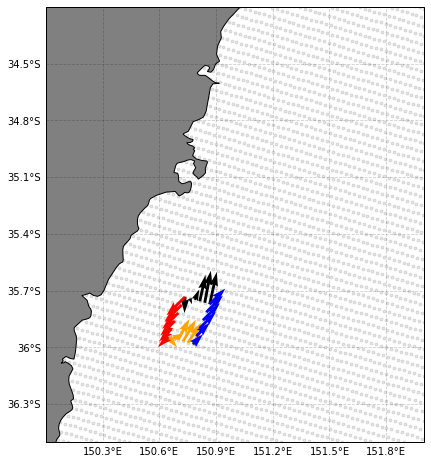

In [22]:
t = '1994-01-21' # time to plot
#Plot the grid
fig = plt.figure(figsize=(8,8))
coast = cfeature.NaturalEarthFeature(category='physical', scale='10m',
                            facecolor='none', name='coastline')
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([150, 152, -36.5, -34.2])
plt.scatter(ds.lon_rho, ds.lat_rho, c="black", alpha=0.1, marker='.',transform=ccrs.PlateCarree())
plt.quiver(ds.lon_rho[jj,box], ds.lat_rho[jj,box], U_z_north.sel(ocean_time='1994-01-01'),V_z_north.sel(ocean_time='1994-01-01'))
plt.quiver(ds.lon_rho[ii,box], ds.lat_rho[ii,box], U_z_south.sel(ocean_time='1994-01-01'),V_z_south.sel(ocean_time='1994-01-01'),color='orange')
plt.quiver(ds.lon_rho[box,jj], ds.lat_rho[box,jj], U_z_east.sel(ocean_time='1994-01-01'),V_z_east.sel(ocean_time='1994-01-01'),color='blue')
plt.quiver(ds.lon_rho[box,ii], ds.lat_rho[box,ii], U_z_west.sel(ocean_time='1994-01-01'),V_z_west.sel(ocean_time='1994-01-01'),color='red')


gl = ax.gridlines(draw_labels=True,
             color='black', alpha=0.2, linestyle='--')
feature = ax.add_feature(coast, edgecolor='black',facecolor='gray')

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylabels_right = False
gl.xlabels_top = False

In [23]:
north_vel_rot

<xarray.DataArray (ocean_time: 540, xi_u: 6, xi_rho: 6)>
dask.array<mul, shape=(540, 6, 6), dtype=float64, chunksize=(30, 6, 6), chunktype=numpy.ndarray>
Coordinates:
    lat_u       (xi_u) float64 dask.array<chunksize=(6,), meta=np.ndarray>
    lon_u       (xi_u) float64 dask.array<chunksize=(6,), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 1994-01-01T12:00:00 ... 1995-06-24T12:00:00
    lon_v       (xi_rho) float64 dask.array<chunksize=(6,), meta=np.ndarray>
    lat_v       (xi_rho) float64 dask.array<chunksize=(6,), meta=np.ndarray>
Dimensions without coordinates: xi_u, xi_rho